# ChatGPT o1 prompt and code

I would like to generate all 6-mer DNA sequences. They would be arranged into 240nt segments and synthetized. Later we will PCR them, so it would be important to have approximately the same GC ratio for all 240nt long segments. Please write a python code that generates the character strings for the segments in this optimized settings and calculates the GC ratios for them.

In [1]:
import itertools
import random

# Step 1: Generate all possible 6-mer DNA sequences
nucleotides = ['A', 'C', 'G', 'T']
all_6mers = [''.join(p) for p in itertools.product(nucleotides, repeat=6)]

# Step 2: Calculate GC content for each 6-mer and bin them by GC count
gc_bins = {i: [] for i in range(7)}  # GC content can range from 0 to 6
for seq in all_6mers:
    gc_count = seq.count('G') + seq.count('C')
    gc_bins[gc_count].append(seq)

# Shuffle sequences in each GC bin to randomize their order
for gc_content in gc_bins:
    random.shuffle(gc_bins[gc_content])

# Step 3: Initialize segment capacities
total_sequences = len(all_6mers)
num_segments = 103  # 102 segments of size 40, 1 segment of size 16 (adjusted later)
base_capacity = total_sequences // num_segments  # Base number of sequences per segment
extra_sequences = total_sequences % num_segments  # Sequences remaining after base distribution

segment_capacities = [base_capacity] * num_segments
for i in range(extra_sequences):
    segment_capacities[i] += 1  # Distribute extra sequences among the first segments

# Adjust last segment to reach 240nt by adding padding sequences if necessary
max_segment_size = 40  # Maximum number of 6-mers per segment to reach 240nt
for i in range(len(segment_capacities)):
    if segment_capacities[i] < max_segment_size:
        segment_capacities[i] = max_segment_size  # Pad with random sequences later

# Step 4: Initialize segments
segments = [{'sequences': [], 'current_size': 0, 'capacity': cap} for cap in segment_capacities]

# Step 5: Distribute sequences from GC bins into segments
segment_index = 0
for gc_content in range(7):
    bin_sequences = gc_bins[gc_content]
    for seq in bin_sequences:
        # Find the next segment that has capacity
        while segments[segment_index % num_segments]['current_size'] >= segments[segment_index % num_segments]['capacity']:
            segment_index += 1
        # Assign sequence to the segment
        segment = segments[segment_index % num_segments]
        segment['sequences'].append(seq)
        segment['current_size'] += 1
        segment_index += 1

# Step 6: Pad segments with fewer sequences to reach 240nt
for segment in segments:
    while len(segment['sequences']) < max_segment_size:
        # Add random 6-mer to pad the segment
        random_seq = random.choice(all_6mers)
        segment['sequences'].append(random_seq)
        segment['current_size'] += 1

# Step 7: Concatenate sequences in each segment and calculate GC content
def calculate_gc_content(sequence):
    gc_count = sequence.count('G') + sequence.count('C')
    return (gc_count / len(sequence)) * 100  # GC percentage

segment_results = []
for idx, segment in enumerate(segments):
    concatenated_seq = ''.join(segment['sequences'])
    gc_content = calculate_gc_content(concatenated_seq)
    segment_results.append({
        'segment_index': idx + 1,
        'sequence': concatenated_seq,
        'gc_content': gc_content
    })

# Step 8: Output the segments and their GC percentages
for result in segment_results:
    print(f"Segment {result['segment_index']}:")
    print(f"Sequence: {result['sequence']}")
    print(f"GC Content: {result['gc_content']:.2f}%")
    print('-' * 50)

Segment 1:
Sequence: TTAATTTAGAAACTTTAAGAAATATCATAAATTCGTAACGTTTCAGAATGATCTTCTTAGCATAGTAAATGCAGTATCAAAGGATCTTGGACCACATATCGCATCCTCGGATGTCCATTCGATCCTTTCCGTCTCCTACCTCATGTTACCGGAATCGGGAATGCCATGAAGCGCCTCTGGCGACAGTCGCCAGCAGTGGAGAGGGTGGGTGGATGGAGGGCGCGGTGGCGACCGCCCAGC
GC Content: 48.75%
--------------------------------------------------
Segment 2:
Sequence: AAATATACTATTCTTTTTATAACAAATGATGAAACATTCCAATCGTATCGTAAACATTGATGTTGATGGTATGTAACTGGAATTATCCGACATGAGGTTCAGCAGCTAAGTACCCCCAATAGTGTCCAACCTCCGTTTGATCGACTTAGGTCACTGCGCATAGCGACTTACCGGGAGCAGGGTAGGTGTCCCACACGCCGCATGGGAAGCAGCAGCCGCCGTGGGTGCGCCCCAGCCACG
GC Content: 48.75%
--------------------------------------------------
Segment 3:
Sequence: TAAATTGTTAATAGTATATAATGTGTTATACAATACGTTTGAGTGTTTTTGTCATACTCTGTTAGTATACCTCTACATTCCATACGATGTCTGGAAACAACCGCCTAACTTGCTTTTGGCTTAGGCGAGAACACGAACACCGAAAACGGTTCCATCAACGCTACCCGACCCTCACGATCCAGGCTGTCGCACACCTCGCGACCAGTGGGACAGGGTCGCAGGTGCCCCCGGTCGTGCGGC
GC Content: 48.75%
--------------------------------------------------
Segm

Explanation:

Generating 6-mers: The code uses itertools.product to generate all possible combinations of the nucleotides 'A', 'C', 'G', 'T' for sequences of length 6.

Calculating GC Content and Binning: Each 6-mer's GC content is calculated, and the sequences are binned according to their GC counts (from 0 to 6). This helps in distributing sequences evenly based on their GC content.

Shuffling Sequences: The sequences in each GC bin are shuffled to randomize their order and prevent any ordering bias.

Segment Capacities: The total number of sequences is divided among the segments to determine how many sequences each should contain. Extra sequences are distributed to ensure all sequences are used.

Distributing Sequences: The sequences are assigned to segments in a way that balances the GC content across all segments. This is done by iterating through the GC bins and assigning sequences in a round-robin fashion while respecting each segment's capacity.

Padding Segments: Segments with fewer sequences are padded with random 6-mers to reach the desired length of 240 nucleotides.

Calculating GC Content per Segment: The concatenated sequence of each segment is used to calculate its GC content percentage.

Output: The final sequences and their GC content percentages are printed for each segment.

Note: This code ensures that each 240nt segment has an approximately equal GC content, which is important for consistent PCR amplification in downstream applications.

---

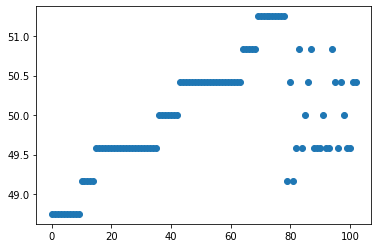

In [2]:
import numpy as np
import matplotlib.pyplot as plt


gc_list = np.asarray([result['gc_content'] for result in segment_results])
plt.plot(gc_list, 'o')
